### K-means clustering

We will implement the K-means algorithm and use it for image compression. We will first start on an example 2D dataset that will help you gain an intuition of how the K-means algorithms works. After that, you will use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import minimize
from scipy.io import loadmat

### 1. Implement the K-means

The K-means algorithm is a method to cluster similar data examples together. You are given a training set {x1,x2,...,xm} and want to group data into a few cohensive clusters. The intuition behind K-means is an iteratice procedure that starts by guessing the initial centroids, and then refines this guess by repeated assigning examples to their closest centroids and then recomputing the centroids based on the assignments. 

#### Part 1: Find Closest Centroids

To help you implement K-Means, we have divided the learning algorithm into two functions -- findClosestCentroids and computeCentroids. In this part, you should complete the code in the findClosestCentroids function. 

In [160]:
# Load an example dataset that we will be using
data2=loadmat('ex7data2.mat');
X=data2['X']
print(X.shape)

(300, 2)


In [161]:
# Select an initial set of centroids
K = 3; # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]]);

In [162]:
# Find the closest centroids for the examples using the initial_centroids
def findClosestCentroids(X, centroids):
#   FINDCLOSESTCENTROIDS computes the centroid memberships for every example
#   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
#   in idx for a dataset X where each row is a single example. idx = m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])
#

# Set K
    K = centroids.shape[0];

# You need to return the following variables correctly.
    idx = np.zeros((X.shape[0],1));

# ====================== YOUR CODE HERE ======================
# Instructions: Go over every example, find its closest centroid, and store
#               the index inside idx at the appropriate location.
#               Concretely, idx(i) should contain the index of the centroid
#               closest to example i. Hence, it should be a value in the 
#               range 1..K
#
# Note: You can use a for-loop over the examples to compute this.
    for i in range(X.shape[0]):
        disc=1000000000000
        for j in range(K):
            if np.dot((X[i,:]-centroids[j,:]).T, (X[i,:]-centroids[j,:]))<disc:
                disc=np.dot((X[i,:]-centroids[j,:]).T, (X[i,:]-centroids[j,:]))
                idx[i]=j
    return idx

In [163]:
idx = findClosestCentroids(X, initial_centroids);
print('Closest centroids for the first 3 examples: \n')
print(idx[0:3]);
print('\n(the closest centroids should be 0,1,2 respectively)\n');

Closest centroids for the first 3 examples: 

[[ 0.]
 [ 2.]
 [ 1.]]

(the closest centroids should be 0,1,2 respectively)



#### Part II: Computing the centroid means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of points that were assigned to it. For every centroid k, we set
<img src='../pic/centroid_mean.JPG'>

Where Ck is the set of examples that are assigned to centroid k. 

In [164]:
def computeCentroids(X, idx, K):
#COMPUTECENTROIDS returns the new centroids by computing the means of the 
#data points assigned to each centroid.
#   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
#   computing the means of the data points assigned to each centroid. It is
#   given a dataset X where each row is a single data point, a vector
#   idx of centroid assignments (i.e. each entry in range [1..K]) for each
#   example, and K, the number of centroids. You should return a matrix
#   centroids, where each row of centroids is the mean of the data points
#   assigned to it.

# Useful variables
    m,n=X.shape

# You need to return the following variables correctly.
    centroids = np.zeros((K, n));
    for i in range(K):
        centroids[i,:]=np.array([X[np.where(idx.reshape(-1,)==i)].mean(axis=0)])

# ====================== YOUR CODE HERE ======================
# Instructions: Go over every centroid and compute mean of all points that
#               belong to it. Concretely, the row vector centroids(i, :)
#               should contain the mean of the data points assigned to
#               centroid i.
#
# Note: You can use a for-loop over the centroids to compute this.
#
    return centroids

In [165]:
#  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K);

print('Centroids computed after initial finding of closest centroids: \n')
print(centroids);
print('\n(the centroids should be\n');
print('   [ 2.428301 3.157924 ]\n');
print('   [ 5.813503 2.633656 ]\n');
print('   [ 7.119387 3.616684 ]\n\n');

Centroids computed after initial finding of closest centroids: 

[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]

(the centroids should be

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]




#### Part 3: K-means on example dataset

When you run the next step, the K-means code will produce a visualization that steps you through the progress of the algorithm at each iteration. For consistency, here we set centroids to specific values but in practice you want to generate them automatically, such as by settings them to be random examples (as can be seen in kMeansInitCentroids).

In [166]:
# Settings for running K-Means
K = 3;
max_iters = 10;
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]]);

In [167]:
import numpy as np
from matplotlib import colors

def hsv(n=63):
    """
    adapted from Octave's (NOT matlab's) hsv(N) function
      which is equivalent to matlab's hsv2rgb([(0:N-1)'/N, ones(N,2)])
      from: http://octave.sourceforge.net/octave/function/hsv.html
            http://stackoverflow.com/q/23945764/583834
    """

    # return colors.hsv_to_rgb( np.column_stack([ np.array(range(n+1)).T / float(n), np.ones( ((n+1), 2) ) ]) )
    return colors.hsv_to_rgb( np.column_stack([ np.linspace(0, 1, n+1)            , np.ones( ((n+1), 2) ) ]) )

In [168]:
import matplotlib.pyplot as plt
import numpy as np

def plotDataPoints(X, idx, K):
    #PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
    #index assignments in idx have the same color
    #   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
    #   with the same index assignments in idx have the same color

    # Create palette (see hsv.py)
    palette = hsv( K )
    colors = np.array([palette[int(i)] for i in idx])

    # Plot the data
    plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors=colors)

    return

In [169]:
import matplotlib.pyplot as plt

def drawLine(p1, p2, **kwargs):
#   DRAWLINE Draws a line from point p1 to point p2
#   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
#   current figure

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)
    # [p1[0], p2[0]] is the x part
    # [p1[1], p2[1]] is the y part

In [170]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
#   PLOTPROGRESSKMEANS is a helper function that displays the progress of 
#   k-Means as it is running. It is intended for use only with 2D data.
#   PLOTPROGRESSKMEANS(X, centroids, previous, idx, K, i) plots the data
#   points with colors assigned to each centroid. With the previous
#   centroids, it also plots a line between the previous locations and
#   current locations of the centroids.
# Plot the examples

    plotDataPoints(X, idx, K);

# Plot the centroids as black x's
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='k')

# Plot the history of the centroids with lines
    for j in range(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :], c='b')

# Title
    plt.title(print('Iteration number:', i))

In [171]:
def runkMeans(X, initial_centroids, max_iters, plot_progress): 
                                      
#   RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
#   is a single example
#   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
#   plot_progress) runs the K-Means algorithm on data matrix X, where each 
#   row of X is a single example. It uses initial_centroids used as the
#   initial centroids. max_iters specifies the total number of interactions 
#   of K-Means to execute. plot_progress is a true/false flag that 
#   indicates if the function should also plot its progress as the 
#   learning happens. This is set to false by default. runkMeans returns 
#   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])

# Plot the data if we are plotting progress
# Initialize values
    m,n=X.shape
    K=initial_centroids.shape[0]
    centroids = initial_centroids;
    previous_centroids = centroids;
    idx = np.zeros((m, 1));

# Run K-Means
    for i in range(max_iters):
    
    # Output progress
        print('K-Means iteration \n', i, max_iters);
    
    # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids);
           
    # Optionally, plot progress here
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i);
            previous_centroids = centroids;
            # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K); 
    
    return centroids, idx

K-Means iteration 
 0 10
Iteration number: 0
K-Means iteration 
 1 10
Iteration number: 1
K-Means iteration 
 2 10
Iteration number: 2
K-Means iteration 
 3 10
Iteration number: 3
K-Means iteration 
 4 10
Iteration number: 4
K-Means iteration 
 5 10
Iteration number: 5
K-Means iteration 
 6 10
Iteration number: 6
K-Means iteration 
 7 10
Iteration number: 7
K-Means iteration 
 8 10
Iteration number: 8
K-Means iteration 
 9 10
Iteration number: 9


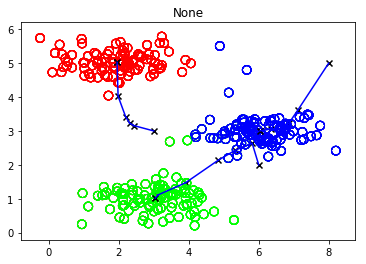

In [172]:
# Run K-Means algorithm. The 'true' at the end tells our function to plot the progress of K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, True);

#### Part 4: Random Initialization

In practice, it is good strategy for initializaing the centroids to select the random examples from the training sets.

In [173]:
def kMeansInitCentroids(X, K):
#KMEANSINITCENTROIDS This function initializes K centroids that are to be 
#used in K-Means on the dataset X
#   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
#   used with the K-Means on the dataset X
#

# You should return this values correctly
    m=X.shape[0]
    index=np.random.permutation(m)
    centroids=X[index[:K],:]
    return centroids

In [178]:
K=3
initial_centroids=kMeansInitCentroids(X, K)
initial_centroids

array([[ 2.73911908,  1.10072284],
       [ 4.01714917,  1.16070647],
       [ 4.06069132,  4.99503862]])

K-Means iteration 
 0 10
Iteration number: 0
K-Means iteration 
 1 10
Iteration number: 1
K-Means iteration 
 2 10
Iteration number: 2
K-Means iteration 
 3 10
Iteration number: 3
K-Means iteration 
 4 10
Iteration number: 4
K-Means iteration 
 5 10
Iteration number: 5
K-Means iteration 
 6 10
Iteration number: 6
K-Means iteration 
 7 10
Iteration number: 7
K-Means iteration 
 8 10
Iteration number: 8
K-Means iteration 
 9 10
Iteration number: 9


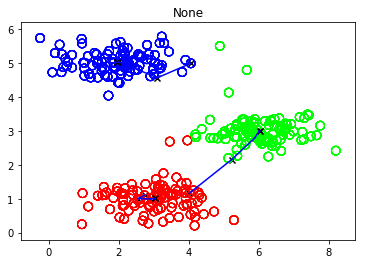

In [179]:
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, True);

#### Part 6: Image compression with K-means

In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integars (ranging from 0-255) that specify red, green and blue intensity values. This encoding is often referred to as the RGB encoding. Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors. 

In this exercise, you will use the K-means algorithm to select 16 colors that will be used to represent the compressed image. You will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group(cluster) the pixles in the original image. 

#### 6.1 K-means on pixels


In [182]:
from scipy.misc import imread

#  Load an image of a bird
A=imread('bird_small.png')
type(A)

numpy.ndarray

In [193]:
A = A / 255; # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape;

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, (img_size[0]*img_size[1],3));

In [187]:
mat = loadmat('bird_small.mat')
A = mat["A"]

A = A / 255.0 # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(img_size[0] * img_size[1], 3, order='F').copy()
X

array([[ 0.85882353,  0.70588235,  0.40392157],
       [ 0.90196078,  0.75686275,  0.46666667],
       [ 0.89411765,  0.74901961,  0.48235294],
       ..., 
       [ 0.28235294,  0.2       ,  0.16862745],
       [ 0.23137255,  0.16862745,  0.16470588],
       [ 0.20392157,  0.15294118,  0.13333333]])

K-Means iteration 
 0 10
Iteration number: 0
K-Means iteration 
 1 10
Iteration number: 1
K-Means iteration 
 2 10
Iteration number: 2
K-Means iteration 
 3 10
Iteration number: 3
K-Means iteration 
 4 10
Iteration number: 4
K-Means iteration 
 5 10
Iteration number: 5
K-Means iteration 
 6 10
Iteration number: 6
K-Means iteration 
 7 10
Iteration number: 7
K-Means iteration 
 8 10
Iteration number: 8
K-Means iteration 
 9 10
Iteration number: 9


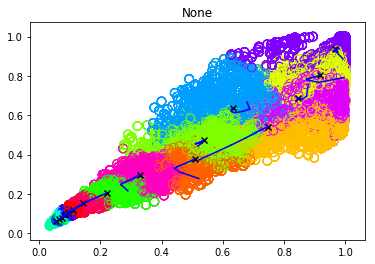

In [197]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

# When using K-Means, it is important the initialize the centroids randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding

initial_centroids = kMeansInitCentroids(X, K);
# Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters,True);

#### 6.2: Image Compression 

In this part of the exercise, you will use the clusters of K-Means to compress an image. To do this, we first find the closest clusters for each example. After that, we 